[Página de Alura](https://www.aluracursos.com/)


```
# Esto tiene formato de código
```



### Importación de datos



In [4]:
pip install geopandas

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
from shapely.geometry import Point

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [43]:
# Leer el archivo .shp de Colombia (por ejemplo: municipios o departamentos)
colombia = gpd.read_file("gadm41_COL_1.shp")  # Cambia el nombre según tu archivo

In [44]:
# Supongamos que 'tabla' ya tiene las columnas 'lat' y 'lon'
# Convertir a GeoDataFrame con geometría de puntos
tabla_gdf = gpd.GeoDataFrame(
    tienda,
    geometry=gpd.points_from_xy(tienda2['lon'], tienda2['lat']),
    crs="EPSG:4326"  # WGS 84 (lat/lon estándar)
)

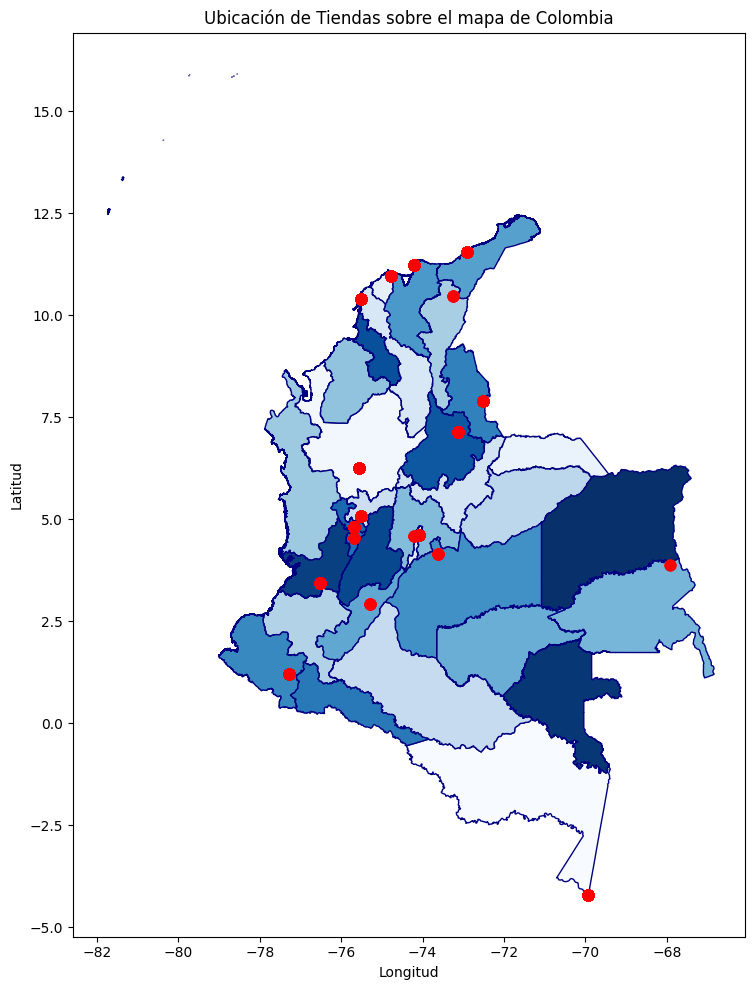

In [54]:
# Graficar el mapa base
fig, ax = plt.subplots(figsize=(10, 10))
colombia.plot(ax=ax, cmap='Blues', edgecolor='navy', legend=True)

# Graficar los puntos de tienda en rojo
tabla_gdf.plot(ax=ax, color='red', markersize=60)

# Título y estilo
plt.title("Ubicación de Tiendas sobre el mapa de Colombia")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(False)
plt.tight_layout()
plt.show()


<ipython-input-2-b2963c23cf09>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(tienda, x='Costo de envío', y='Categoría del Producto', inner='box', palette='Dark2')


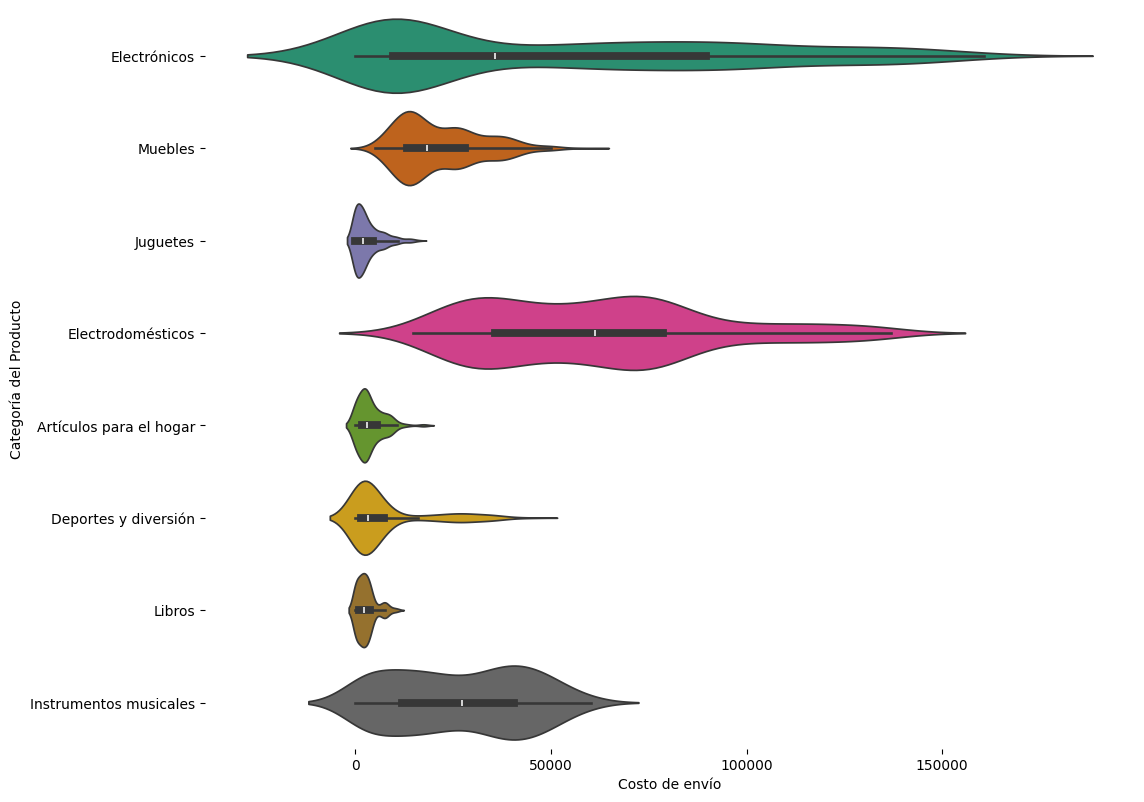

In [2]:
# @title Categoría del Producto vs Costo de envío

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(tienda['Categoría del Producto'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(tienda, x='Costo de envío', y='Categoría del Producto', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

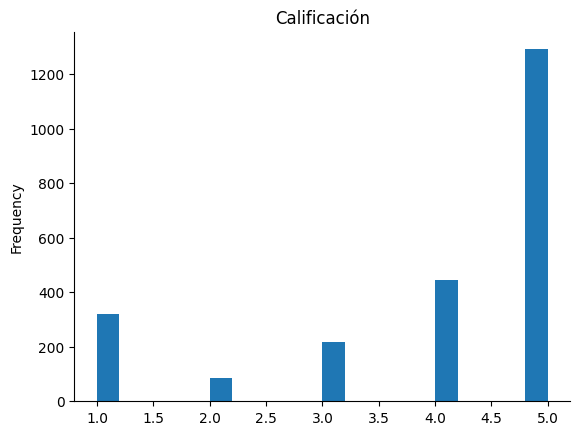

In [ ]:
# @title Calificación

from matplotlib import pyplot as plt
tienda['Calificación'].plot(kind='hist', bins=20, title='Calificación')
plt.gca().spines[['top', 'right',]].set_visible(False)

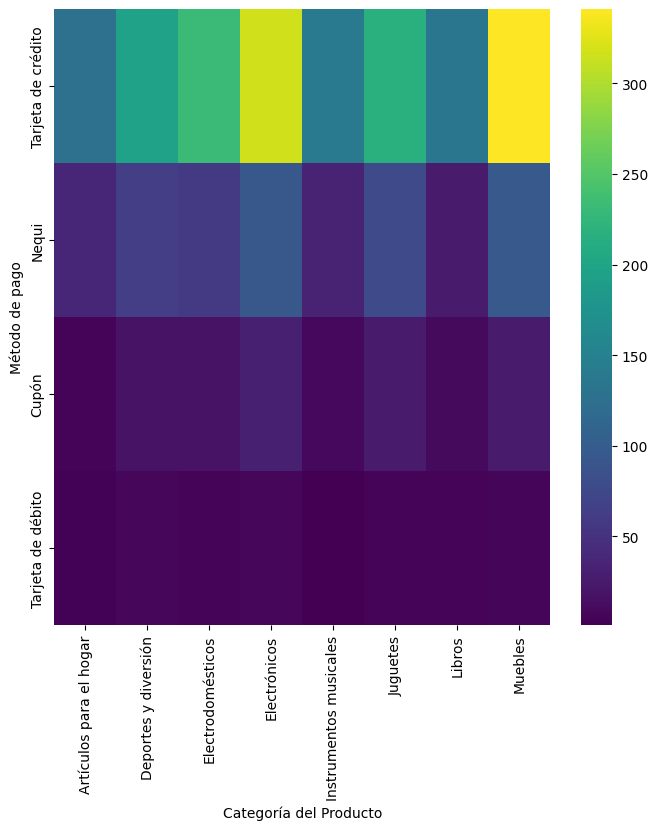

In [ ]:
# @title Categoría del Producto vs Método de pago

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Método de pago'].value_counts()
    for x_label, grp in tienda.groupby('Categoría del Producto')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Categoría del Producto')
_ = plt.ylabel('Método de pago')

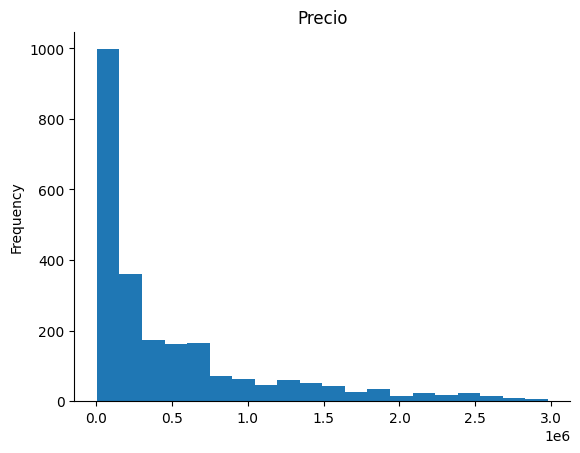

In [ ]:
# @title Precio

from matplotlib import pyplot as plt
tienda['Precio'].plot(kind='hist', bins=20, title='Precio')
plt.gca().spines[['top', 'right',]].set_visible(False)

#1. Análisis de facturación



In [ ]:
facturacion = [tienda['Precio'] + tienda['Costo de envío'], tienda2['Precio'] + tienda2['Costo de envío'], tienda3['Precio'] + tienda3['Costo de envío'], tienda4['Precio'] + tienda4['Costo de envío']]

In [ ]:
facturacion

[0        171200.0
 1        200700.0
 2        225500.0
 3        798500.0
 4        355400.0
           ...    
 2354    1351000.0
 2355     298100.0
 2356     130100.0
 2357     726300.0
 2358     203600.0
 Length: 2359, dtype: float64,
 0        298900.0
 1         79100.0
 2        467100.0
 3        952600.0
 4        417200.0
           ...    
 2354     148400.0
 2355    1285300.0
 2356     840800.0
 2357    2340900.0
 2358     578500.0
 Length: 2359, dtype: float64,
 0       1351700.0
 1        303700.0
 2        320900.0
 3         62100.0
 4        547000.0
           ...    
 2354      28800.0
 2355      34000.0
 2356     502700.0
 2357     127800.0
 2358      72800.0
 Length: 2359, dtype: float64,
 0       1140800.0
 1        499200.0
 2         23700.0
 3         59000.0
 4        144500.0
           ...    
 2353     240300.0
 2354     360600.0
 2355      39100.0
 2356     160100.0
 2357      12500.0
 Length: 2358, dtype: float64]

In [55]:
# Lista de facturación por tienda (cada elemento es una Serie de valores por fila)
facturacion = [
    tienda['Precio'] + tienda['Costo de envío'],
    tienda2['Precio'] + tienda2['Costo de envío'],
    tienda3['Precio'] + tienda3['Costo de envío'],
    tienda4['Precio'] + tienda4['Costo de envío']
]

# Sumar facturación total de cada tienda
totales = [f.sum() for f in facturacion]
nombres_tiendas = ['Tienda A', 'Tienda B', 'Tienda C', 'Tienda D']

In [56]:
df_facturacion = pd.DataFrame({
    'Tienda': nombres_tiendas,
    'Facturación': totales
})

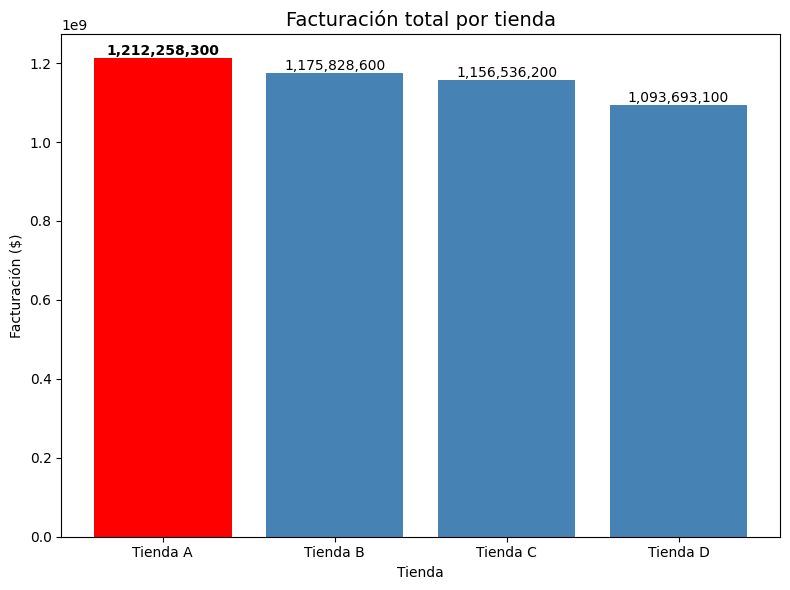

In [62]:
# Identificar el índice del valor máximo
max_index = df_facturacion['Facturación'].idxmax()

# Asignar colores: el más alto en rojo, los demás en azul
colors = ['red' if i == max_index else 'steelblue' for i in range(len(df_facturacion))]

# Crear gráfico
plt.figure(figsize=(8, 6))
bars = plt.bar(df_facturacion['Tienda'], df_facturacion['Facturación'], color=colors)

# Añadir texto encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        yval,
        f'{yval:,.0f}',
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold' if bar.get_facecolor() == (1.0, 0.0, 0.0, 1.0) else 'normal'  # negrita para el más alto
    )

plt.title("Facturación total por tienda", fontsize=14)
plt.xlabel("Tienda")
plt.ylabel("Facturación ($)")
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [ ]:
# Agrupar por categoría y contar la cantidad de ventas (una fila = una venta)
ventas_por_categoria = [tienda['Categoría del Producto'].value_counts(), tienda2['Categoría del Producto'].value_counts(), tienda3['Categoría del Producto'].value_counts(), tienda4['Categoría del Producto'].value_counts()]

print(ventas_por_categoria)


[Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64, Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64, Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64, Categoría del Producto
Muebles                    480
Electrónicos               451
Juguetes            

<BarContainer object of 2359 artists>

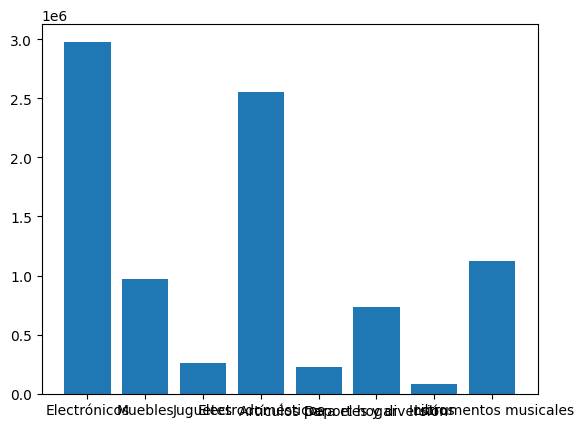

In [ ]:
plt.bar(tienda['Categoría del Producto'], tienda['Precio'])

# 3. Calificación promedio de la tienda


In [ ]:
# Calcular calificación promedio
calificacion_promedio = tienda['Calificación'].mean()

print(f'Calificación promedio de la tienda: {calificacion_promedio:.2f}')


Calificación promedio de la tienda: 3.98


<BarContainer object of 2359 artists>

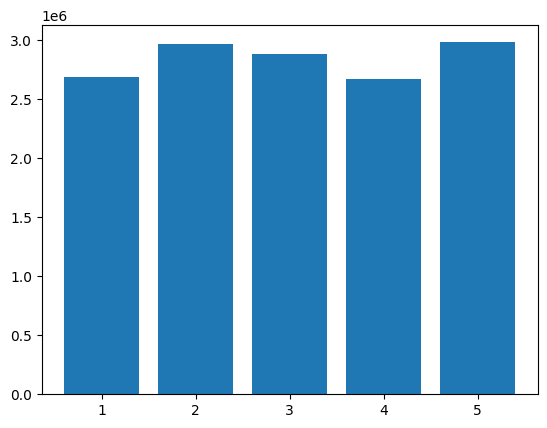

In [ ]:
plt.bar(tienda['Calificación'], tienda['Precio'])

# 4. Productos más y menos vendidos

In [ ]:
# Contar ventas por producto
ventas_por_producto = tienda['Producto'].value_counts().reset_index()

# Producto más vendido
producto_mas_vendido = ventas_por_producto.iloc[0]

# Producto menos vendido (último en la lista)
producto_menos_vendido = ventas_por_producto.iloc[-1]

print("Producto más vendido:")
print(producto_mas_vendido)

print("\nProducto menos vendido:")
print(producto_menos_vendido)

Producto más vendido:
Producto    Microondas
count               60
Name: 0, dtype: object

Producto menos vendido:
Producto    Celular ABXY
count                 33
Name: 50, dtype: object


In [ ]:
# Contar ventas por producto
ventas_por_producto2 = tienda2['Producto'].value_counts().reset_index()

# Producto más vendido
producto_mas_vendido2 = ventas_por_producto2.iloc[0]

# Producto menos vendido (último en la lista)
producto_menos_vendido2 = ventas_por_producto2.iloc[-1]

print("Producto más vendido:")
print(producto_mas_vendido2)

print("\nProducto menos vendido:")
print(producto_menos_vendido2)

Producto más vendido:
Producto    Iniciando en programación
count                              65
Name: 0, dtype: object

Producto menos vendido:
Producto    Juego de mesa
count                  32
Name: 50, dtype: object


In [ ]:
# Contar ventas por producto
ventas_por_producto3 = tienda3['Producto'].value_counts().reset_index()

# Producto más vendido
producto_mas_vendido3 = ventas_por_producto3.iloc[0]

# Producto menos vendido (último en la lista)
producto_menos_vendido3 = ventas_por_producto3.iloc[-1]

print("Producto más vendido:")
print(producto_mas_vendido3)

print("\nProducto menos vendido:")
print(producto_menos_vendido3)

Producto más vendido:
Producto    Kit de bancas
count                  57
Name: 0, dtype: object

Producto menos vendido:
Producto    Bloques de construcción
count                            35
Name: 50, dtype: object


In [ ]:
# Contar ventas por producto
ventas_por_producto4 = tienda4['Producto'].value_counts().reset_index()

# Producto más vendido
producto_mas_vendido4 = ventas_por_producto4.iloc[0]

# Producto menos vendido (último en la lista)
producto_menos_vendido4 = ventas_por_producto4.iloc[-1]

print("Producto más vendido:")
print(producto_mas_vendido4)

print("\nProducto menos vendido:")
print(producto_menos_vendido4)

Producto más vendido:
Producto    Cama box
count             62
Name: 0, dtype: object

Producto menos vendido:
Producto    Guitarra eléctrica
count                       33
Name: 50, dtype: object


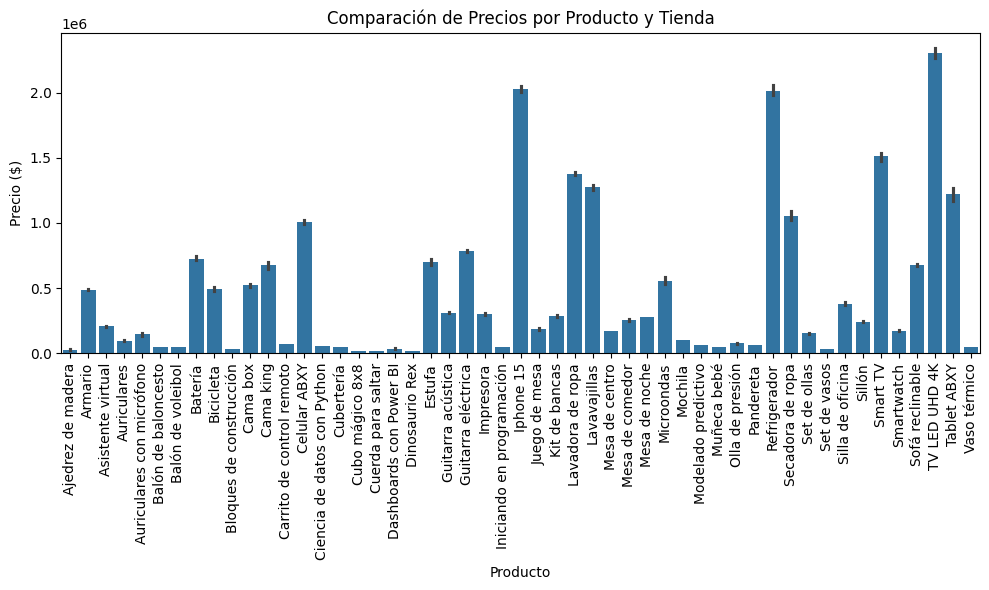

In [ ]:
tienda[0] = 'Tienda A'
tienda2[0] = 'Tienda B'
tienda3[0] = 'Tienda C'
tienda4[0] = 'Tienda D'

# Combinar todos en uno solo
df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

# Ahora puedes hacer un gráfico de precios promedio por producto y tienda
# (si hay productos repetidos en distintas tiendas)
precio_promedio = df_total.groupby(['Producto', 0])['Precio'].mean().reset_index()

# Gráfico de barras agrupado por producto y tienda
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=precio_promedio, x='Producto', y='Precio')
plt.title('Comparación de Precios por Producto y Tienda')
plt.ylabel('Precio ($)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

In [ ]:
# Calcular envío promedio por tienda
envio_promedio_por_tienda = tienda.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()

# Redondear si deseas
envio_promedio_por_tienda['Costo de envío'] = envio_promedio_por_tienda['Costo de envío'].round(2)

print(envio_promedio_por_tienda)

   Lugar de Compra  Costo de envío
0          Armenia        17314.29
1     Barranquilla        23708.00
2           Bogotá        23815.85
3      Bucaramanga        30587.10
4             Cali        28827.56
5        Cartagena        22624.53
6           Cúcuta        40129.41
7          Inírida        28460.00
8          Leticia        24450.00
9        Manizales        29140.00
10        Medellín        28207.10
11           Neiva        31516.67
12           Pasto        35078.26
13         Pereira        22403.76
14        Riohacha        24357.50
15     Santa Marta        22593.75
16          Soacha        43420.00
17      Valledupar        18766.67
18   Villavicencio        34709.09


In [ ]:
plot.bar(envio_promedio_por_tienda['Lugar de Compra'], envio_promedio_por_tienda['Costo de envío'])

NameError: name 'plot' is not defined